Ashley Brown, 9/18/22

ID 801055033

Homework 0

In [2]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
#configure data sets
data_set = '/content/drive/MyDrive/IntroToMachineLearning/D3.csv'
df = pd.read_csv(data_set)
df.head() # get first n rows from the dataset, default value of n is 5 
m=len(df) 
m #print for verification

100

In [4]:
#get input values for each variable
x1 = df.values[:, 0]  # get input values from first column 
x2 = df.values[:, 1]  # get input values from second column 
x3 = df.values[:, 2]  # get input values from third column 
y = df.values[:, 3]  # get output values from fourth column 
m = len(y) # number of training examples 
#print first five values of each column for verification
print('x1 = ', x1[: 5])
print('x2 = ', x2[: 5])
print('x2 = ', x2[: 5])
print('y = ', y[: 5]) 
print('m = ', m)

x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
x2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
x2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


In [5]:
#plot x1
""" 
  plt.scatter(x1,y, color='red',marker= '+')
  plt.grid() 
  plt.rcParams["figure.figsize"] = (10,6) 
  plt.xlabel('x1') 
  plt.ylabel('y') 
  plt.title('scatter plot of training data x1') 
""" 

' \n  plt.scatter(x1,y, color=\'red\',marker= \'+\')\n  plt.grid() \n  plt.rcParams["figure.figsize"] = (10,6) \n  plt.xlabel(\'x1\') \n  plt.ylabel(\'y\') \n  plt.title(\'scatter plot of training data x1\') \n'

In [6]:
#plot x2
""" 
  plt.scatter(x2,y, color='blue',marker= '+')
  plt.grid() 
  plt.rcParams["figure.figsize"] = (10,6) 
  plt.xlabel('x2') 
  plt.ylabel('y') 
  plt.title('scatter plot of training data x2') 
""" 

' \n  plt.scatter(x2,y, color=\'blue\',marker= \'+\')\n  plt.grid() \n  plt.rcParams["figure.figsize"] = (10,6) \n  plt.xlabel(\'x2\') \n  plt.ylabel(\'y\') \n  plt.title(\'scatter plot of training data x2\') \n'

In [7]:
#plot x3
""" 
  plt.scatter(x3,y, color='green',marker= '+')
  plt.grid() 
  plt.rcParams["figure.figsize"] = (10,6) 
  plt.xlabel('x3') 
  plt.ylabel('y') 
  plt.title('scatter plot of training data x3') 
""" 

' \n  plt.scatter(x3,y, color=\'green\',marker= \'+\')\n  plt.grid() \n  plt.rcParams["figure.figsize"] = (10,6) \n  plt.xlabel(\'x3\') \n  plt.ylabel(\'y\') \n  plt.title(\'scatter plot of training data x3\') \n'

Problem 1 (50 points)

Develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, you need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).

1. Report the linear model you found for each explanatory variable.
2. Plot the final regression model and loss over the iteration per each explanatory variable.
3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
4. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.

------------------x1-------------------------------------------------

.

.

.

------------------x1-------------------------------------------------

In [8]:
#create matrix of ones for x1
x1_0 = np.ones((m, 1)) 
x1_0[:5] #print for verification

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
# convert x1 into 2d array of dimension 100x1
x1_1 = x1.reshape(m, 1) 
x1_1[:10] #print for verification

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636]])

In [10]:
# turn x1 0 and x1 1 into a column, creating our final x1 matrix 
x1 = np.hstack((x1_0, x1_1)) 
x1[:5] #print for verification
# m is the number of training examples
# n is the number of features

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [11]:
#create our theta
theta = np.zeros(2) 
theta #print for verification

array([0., 0.])

In [12]:
#linear regression loss for x (using formula from class)
#generalized so it can be reused for x1, x2, x3
def compute_loss(x, y, theta): 

  predictions = x.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [13]:
# compute the loss for theta values (not required but helps debug)
loss = compute_loss(x1, y, theta) 
print('The loss for given values of theta_0 and theta_1 =', loss) 

The loss for given values of theta_0 and theta_1 = 5.524438459196242


In [14]:
#py version of gradient descent formula from class
#generalized so it can be reused for x1, x2, x3
def gradient_descent(input, y, theta, alpha, iterations): 

  loss_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = input.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * input.transpose().dot(errors); 
    theta = theta - sum_delta; 
    loss_history[i] = compute_loss(input, y, theta)   
    
  return theta, loss_history 

In [15]:
# lets define some variables
theta = [0., 0.] 
iterations = 1500
alpha = 0.01 # learning rate, change this for part 4

In [16]:
# calculate our final theta and loss history
theta, loss_history = gradient_descent(x1, y, theta, alpha, iterations) 
print('final theta =', theta) 
print('loss_history =', loss_history) 

final theta = [ 5.71850653 -1.9568206 ]
loss_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


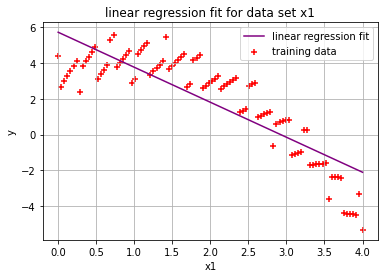

In [17]:
# plot linear model for x1
plt.scatter(x1[:,1], y, color='red', marker= '+', label= 'training data') 
plt.plot(x1[:,1],x1.dot(theta), color='purple', label='linear regression fit') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('x1') 
plt.ylabel('y') 
plt.title('linear regression fit for data set x1') 
plt.legend() 

Text(0.5, 1.0, 'convergence of gradient descent for x1')

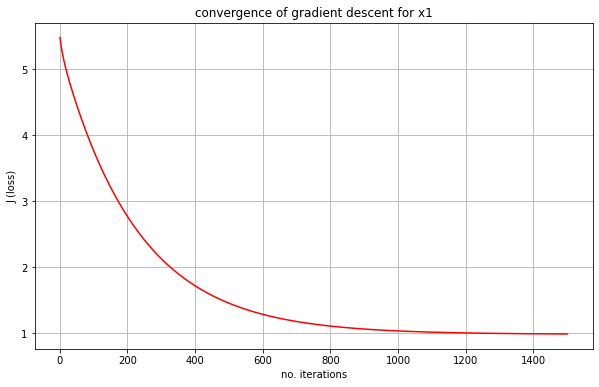

In [18]:
#plot convergence of gradient descent (part 2 of problem 1)
plt.plot(range(1, iterations + 1),loss_history, color='red') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('J (loss)') 
plt.title('convergence of gradient descent for x1') 

------------------x2-------------------------------------------------

.

.

.

------------------x2-------------------------------------------------

In [19]:
#create matrix of ones for x2
x2_0 = np.ones((m, 1)) 
x2_0[:5] #print for verification

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [20]:
# convert x2 into 2d array of dimension 100x1
x2_1 = x2.reshape(m, 1) 
x2_1[:10] #print for verification

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [21]:
# turn x2 0 and x2 1 into a column, creating our final x2 matrix 
x2 = np.hstack((x2_0, x2_1)) 
x2[:5] #print for verification
# m is the number of training examples
# n is the number of features

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [22]:
# lets define some variables
theta = [0., 0.] 
iterations = 1500
alpha = 0.01 # learning rate, change this for part 4

In [23]:
#calculate our final theta and loss history
theta, loss_history = gradient_descent(x2, y, theta, alpha, iterations)
print('final theta =', theta) 
print('loss_history =', loss_history) 

final theta = [0.71988473 0.56390334]
loss_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


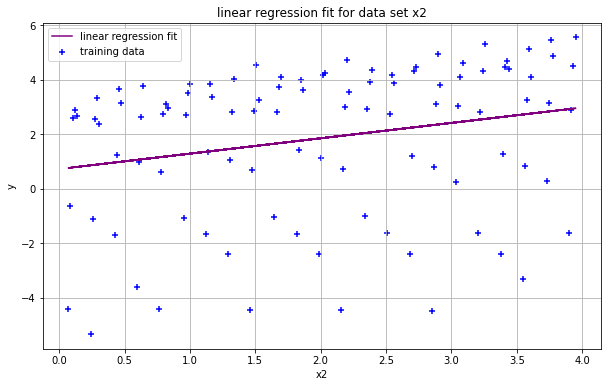

In [24]:
# plot linear model for x2
plt.scatter(x2[:,1], y, color='blue', marker= '+', label= 'training data') 
plt.plot(x2[:,1],x2.dot(theta), color='purple', label='linear regression fit') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('x2') 
plt.ylabel('y') 
plt.title('linear regression fit for data set x2') 
plt.legend() 

Text(0.5, 1.0, 'convergence of gradient descent for x2')

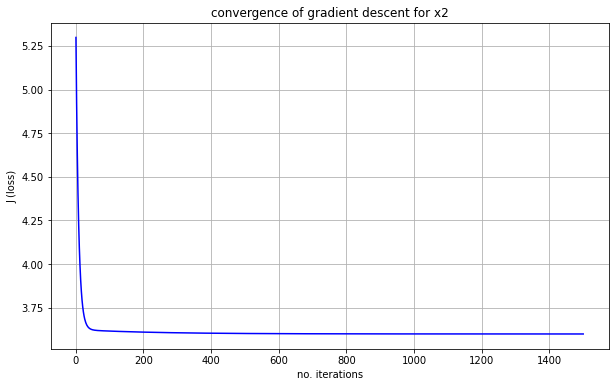

In [25]:
#plot convergence of gradient descent (part 2 of problem 1) 
plt.plot(range(1, iterations + 1),loss_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('J (loss)') 
plt.title('convergence of gradient descent for x2') 

------------------x3-------------------------------------------------

.

.

.

------------------x3-------------------------------------------------

In [26]:
#create matrix of ones for x3
x3_0 = np.ones((m, 1)) 
x3_0[:5] #print for verification

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [27]:
# convert x3 into 2d array of dimension 100x1
x3_1 = x3.reshape(m, 1) 
x3_1[:10] #print for verification

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [28]:
# turn x3 0 and x3 1 into a column, creating our final x3 matrix 
x3 = np.hstack((x3_0, x3_1)) 
x3[:5] #print for verification
# m is the number of training examples
# n is the number of features

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [29]:
# lets define some variables
theta = [0., 0.] 
iterations = 1500
alpha = 0.01 # learning rate, change this for part 4

In [30]:
#calculate our final theta and loss history
theta, loss_history = gradient_descent(x3, y, theta, alpha, iterations)
print('final theta =', theta) 
print('loss_history =', loss_history) 

final theta = [ 2.78048129 -0.48451631]
loss_history = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


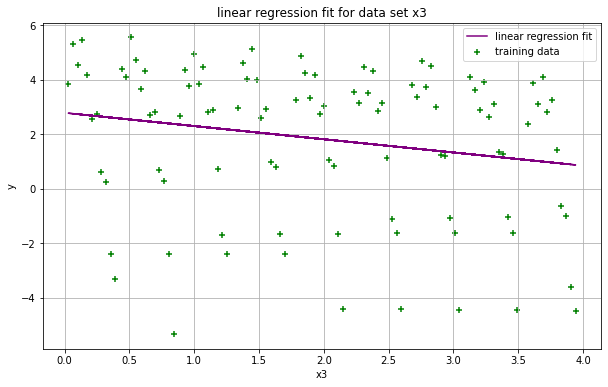

In [31]:
# plot linear model for x3
plt.scatter(x3[:,1], y, color='green', marker= '+', label= 'training data') 
plt.plot(x3[:,1],x3.dot(theta), color='purple', label='linear regression fit') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('x3') 
plt.ylabel('y') 
plt.title('linear regression fit for data set x3') 
plt.legend() 

Text(0.5, 1.0, 'convergence of gradient descent for x3')

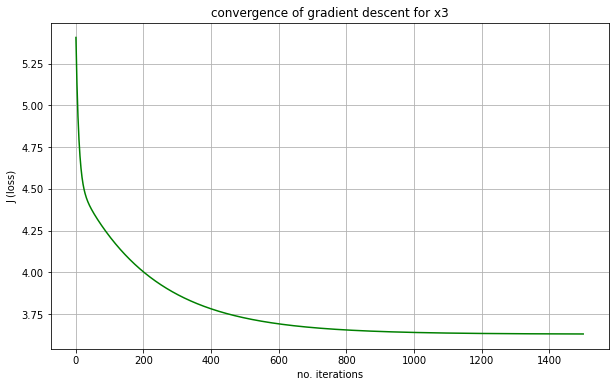

In [32]:
#plot convergence of gradient descent (part 2 of problem 1)
plt.plot(range(1, iterations + 1),loss_history, color='green') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('J (loss)') 
plt.title('convergence of gradient descent for x3') 

Problem 2 (50 points)

This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

1. Report the final linear model you found the best. 
2. Plot loss over the iteration.
3. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.
4. Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

In [33]:
df2 = pd.read_csv(data_set)
df2 = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df2.head()
# 00 is a column of 1's

,00,X1,X2,X3,Y
0,1,0.000000,3.440000,0.440000,4.387545
1,1,0.040404,0.134949,0.888485,2.679650
2,1,0.080808,0.829899,1.336970,2.968490
3,1,0.121212,1.524848,1.785455,3.254065
4,1,0.161616,2.219798,2.233939,3.536375


In [34]:
#the input is all columns except y, so we drop column y
x = df2.drop(columns='Y')
y = df2.iloc[:, 4]

In [35]:
#create our theta
theta = np.array([0]*len(x.columns))
theta #print for verification

array([0, 0, 0, 0])

In [36]:
#lets define some variables again
iterations = 1500
alpha = .01 #change for problem 2 part 3

In [37]:
#calculate our final theta and loss history
theta, loss_history = gradient_descent(x, y, theta, alpha, iterations)
print('final theta:\n', theta) 
print('loss_history =', loss_history) 

final theta:
 00    4.151187
X1   -1.839429
X2    0.724739
X3   -0.095133
dtype: float64
loss_history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


Text(0.5, 1.0, 'convergence of gradient descent for x1, x2, and x3')

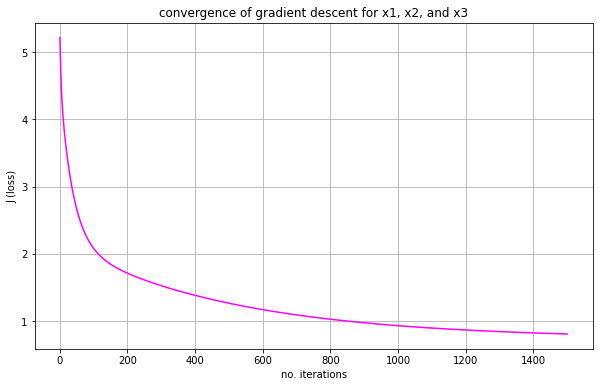

In [38]:
#plot convergence of gradient descent (part 2 of problem 2)
plt.plot(range(1, iterations + 1),loss_history, color='magenta') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('J (loss)') 
plt.title('convergence of gradient descent for x1, x2, and x3') 

In [40]:
# "Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)"
# We're going to declare new X1, X2, X3 data sets using those values given to us
data_set2 = {'x1Modified' : [1, 1, 1], 'x2Modified' : [2, 0, 4], 'x3Modified' : [3, 2, 1]}
dfModified = pd.DataFrame(data_set2)
dfModified = pd.concat([pd.Series(1, index=dfModified.index, name='00'), dfModified], axis=1) #concat 1's like in problem 2
dfModified.head()

,00,x1Modified,x2Modified,x3Modified
0,1,1,2,3
1,1,1,0,2
2,1,1,4,1


In [41]:
# convert new stuff to numpy (fixes a bug)
dfModified = dfModified.to_numpy()
theta = theta.to_numpy()

In [45]:
def hypothesis(theta, dfModified): #this function is just a snippet of our earlier compute loss function
  predictions = dfModified.dot(theta)
  return predictions

In [46]:
yModified = hypothesis(theta, dfModified)
yModified

array([3.47583731, 2.12149286, 5.11557976])